In [1]:
#read in images
# ============================================================================
# import modules
# ============================================================================
# Note that this part of the code needs to be run prior to any other code cell

import cv2
import glob
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import matplotlib.animation as animation
from IPython.display import HTML
from mpl_toolkits import mplot3d
from scipy.fftpack import fft, ifft
from sklearn.decomposition import PCA

# inline plots
%matplotlib inline

# ============================================================================
# data loading
# ============================================================================

# PLEASE, SPECIFY YOUR PATH TO THE DATA HERE
datapath = 'BAll_tiffs'

# get the list of files to process
filelist = sorted(glob.glob('/'.join((datapath,'*.tif'))))

# get a list of images
imglist = [cv2.imread(imgfile,cv2.IMREAD_GRAYSCALE) for imgfile in filelist[:]]
imglistClass = [cv2.imread(imgfile,cv2.IMREAD_GRAYSCALE) for imgfile in filelist[:]]

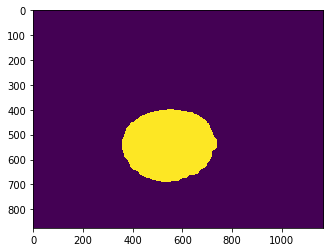

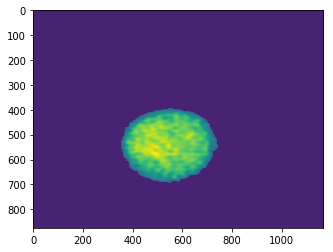

In [2]:
ref = imglist[-1]
thres = 100
refBW = ref.copy()
for i in range(refBW.shape[0]):
    for j in range(refBW.shape[1]):
        if refBW[i,j] < 100:
            refBW[i,j] = 0
        else:
            refBW[i,j] = 255
plt.imshow(refBW)
plt.figure()
plt.imshow(ref)

In [3]:
from skimage import measure 
properties = measure.regionprops(refBW)
[prop.area for prop in properties]

[85653]

In [4]:
[prop.perimeter for prop in properties]

[1186.1635636485403]

In [5]:
# circularity = 4piA/per^2
import math
[(4 * math.pi * prop.area) / (prop.perimeter * prop.perimeter) for prop in properties]

[0.7650032569242028]

In [6]:
[prop.eccentricity for prop in properties]

[0.6371508527571687]

In [7]:
[prop.orientation for prop in properties]

[0.06586264289445264]

In [9]:
imageparams = []
for ref in imglist:
    thres = 100
    refBW = ref.copy()
    for i in range(refBW.shape[0]):
        for j in range(refBW.shape[1]):
            if refBW[i,j] < 100:
                refBW[i,j] = 0
            else:
                refBW[i,j] = 255
    properties = measure.regionprops(refBW)
    A = [prop.area for prop in properties]
    #Per = [prop.perimeter for prop in properties]
    #Cir = [(4 * math.pi * prop.area) / (prop.perimeter * prop.perimeter) for prop in properties]
    #Ecc = [prop.eccentricity for prop in properties]
    #Or = [prop.orientation for prop in properties]
    Cls = 1 # B_All
    imageparams.append([A, Cls])

In [10]:
feats1 = []
for cell in imageparams:
    cellList = []
    for featList in cell[:1]:
        for feat in featList:
            cellList.append(feat)
    cellList.append(cell[1])
    feats1.append(cellList)
    
feats1 = np.array(feats1)

np.savetxt("ballFeatures.txt", feats1)

In [11]:
datapath = 'MN60_abnormal_tiffs'

# get the list of files to process
filelist = sorted(glob.glob('/'.join((datapath,'*.tif'))))

# get a list of images
imglistM = [cv2.imread(imgfile,cv2.IMREAD_GRAYSCALE) for imgfile in filelist[:]]
imglistClassM = [cv2.imread(imgfile,cv2.IMREAD_GRAYSCALE) for imgfile in filelist[:]]

imageparams2 = []
for ref in imglistM:
    thres = 100
    refBW = ref.copy()
    for i in range(refBW.shape[0]):
        for j in range(refBW.shape[1]):
            if refBW[i,j] < 100:
                refBW[i,j] = 0
            else:
                refBW[i,j] = 255
    properties = measure.regionprops(refBW)
    A = [prop.area for prop in properties]
    #Per = [prop.perimeter for prop in properties]
    #Cir = [(4 * math.pi * prop.area) / (prop.perimeter * prop.perimeter) for prop in properties]
    #Ecc = [prop.eccentricity for prop in properties]
    #Or = [prop.orientation for prop in properties]
    Cls = 2 # MN60
    imageparams2.append([A,Cls])

In [12]:
feats2 = []
for cell in imageparams2:
    cellList = []
    for featList in cell[:1]:
        for feat in featList:
            cellList.append(feat)
    cellList.append(cell[1])
    feats2.append(cellList)
    
feats2 = np.array(feats2)

np.savetxt("MN60Features.txt", feats2)

In [ ]:
datapath = 'REH_abnormal_tiffs'

# get the list of files to process
filelist = sorted(glob.glob('/'.join((datapath,'*.tif'))))

# get a list of images
imglistR = [cv2.imread(imgfile,cv2.IMREAD_GRAYSCALE) for imgfile in filelist[:]]
imglistClassR = [cv2.imread(imgfile,cv2.IMREAD_GRAYSCALE) for imgfile in filelist[:]]

imageparams3 = []
for ref in imglistR:
    thres = 100
    refBW = ref.copy()
    for i in range(refBW.shape[0]):
        for j in range(refBW.shape[1]):
            if refBW[i,j] < 100:
                refBW[i,j] = 0
            else:
                refBW[i,j] = 255
    properties = measure.regionprops(refBW)
    A = [prop.area for prop in properties]
    #Per = [prop.perimeter for prop in properties]
    #Cir = [(4 * math.pi * prop.area) / (prop.perimeter * prop.perimeter) for prop in properties]
    #Ecc = [prop.eccentricity for prop in properties]
    #Or = [prop.orientation for prop in properties]
    Cls = 3 # REH
    imageparams3.append([A,Cls])

In [ ]:
feats3 = []
for cell in imageparams3:
    cellList = []
    for featList in cell[:1]:
        for feat in featList:
            cellList.append(feat)
    cellList.append(cell[1])
    feats3.append(cellList)
    
feats3 = np.array(feats3)

np.savetxt("REHFeatures.txt", feats3)

In [ ]:
datapath = 'RS411_abnormal_tiffs'

# get the list of files to process
filelist = sorted(glob.glob('/'.join((datapath,'*.tif'))))

# get a list of images
imglistR4 = [cv2.imread(imgfile,cv2.IMREAD_GRAYSCALE) for imgfile in filelist[:]]
imglistClassR4 = [cv2.imread(imgfile,cv2.IMREAD_GRAYSCALE) for imgfile in filelist[:]]

imageparams4 = []
for ref in imglistR4:
    thres = 100
    refBW = ref.copy()
    for i in range(refBW.shape[0]):
        for j in range(refBW.shape[1]):
            if refBW[i,j] < 100:
                refBW[i,j] = 0
            else:
                refBW[i,j] = 255
    properties = measure.regionprops(refBW)
    A = [prop.area for prop in properties]
    #Per = [prop.perimeter for prop in properties]
    #Cir = [(4 * math.pi * prop.area) / (prop.perimeter * prop.perimeter) for prop in properties]
    #Ecc = [prop.eccentricity for prop in properties]
    #Or = [prop.orientation for prop in properties]
    Cls = 4 # RS411
    imageparams4.append([A,Cls])

In [ ]:
feats4 = []
for cell in imageparams4:
    cellList = []
    for featList in cell[:1]:
        for feat in featList:
            cellList.append(feat)
    cellList.append(cell[1])
    feats4.append(cellList)
    
feats4 = np.array(feats4)

np.savetxt("RS411Features.txt", feats4)

In [ ]:
datapath = 'control_tiffs'

# get the list of files to process
filelist = sorted(glob.glob('/'.join((datapath,'*.tif'))))

# get a list of images
imglistC = [cv2.imread(imgfile,cv2.IMREAD_GRAYSCALE) for imgfile in filelist[:]]
imglistClassC = [cv2.imread(imgfile,cv2.IMREAD_GRAYSCALE) for imgfile in filelist[:]]

imageparams5 = []
for ref in imglistC:
    thres = 100
    refBW = ref.copy()
    for i in range(refBW.shape[0]):
        for j in range(refBW.shape[1]):
            if refBW[i,j] < 100:
                refBW[i,j] = 0
            else:
                refBW[i,j] = 255
    properties = measure.regionprops(refBW)
    A = [prop.area for prop in properties]
    #Per = [prop.perimeter for prop in properties]
    #Cir = [(4 * math.pi * prop.area) / (prop.perimeter * prop.perimeter) for prop in properties]
    #Ecc = [prop.eccentricity for prop in properties]
    #Or = [prop.orientation for prop in properties]
    Cls = 5 # control
    imageparams5.append([A,Cls])

In [ ]:
feats5 = []
for cell in imageparams5:
    cellList = []
    for featList in cell[:1]:
        for feat in featList:
            cellList.append(feat)
    cellList.append(cell[1])
    feats5.append(cellList)
    
feats5 = np.array(feats5)

np.savetxt("controlFeatures.txt", feats5)

In [ ]:
# shannon entropy
shannonB = []
for ref in imglistC:
    shannonEn = measure.shannon_entropy(ref)
    shannonB.append([shannonEn, 1])
    

In [ ]:
for ref2 in imglistR:
    shannonEn = measure.shannon_entropy(ref2)
    shannonB.append([shannonEn, 2])
    

In [ ]:
for ref3 in imglistR4:
    shannonEn = measure.shannon_entropy(ref3)
    shannonB.append([shannonEn, 3])
   

In [ ]:
 for ref4 in imglist[:394]:
    shannonEn = measure.shannon_entropy(ref4)
    shannonB.append([shannonEn, 4])
    
for ref5 in imglistM:
    shannonEn = measure.shannon_entropy(ref5)
    shannonB.append([shannonEn, 5])

In [ ]:
shannonB = np.array(shannonB)
np.savetxt("shannonB.txt", shannonB)

In [ ]:
shannonB_ = []
shannonB2_ = []
shannonB3_ = []
shannonB4_ = []
shannonB5_ = []

for ref in imglist[:394]:
    shannonEn = measure.shannon_entropy(ref)
    shannonB_.append(shannonEn)

for ref2 in imglistM:
    shannonEn = measure.shannon_entropy(ref2)
    shannonB2_.append(shannonEn)
    
for ref3 in imglistR:
    shannonEn = measure.shannon_entropy(ref3)
    shannonB3_.append(shannonEn)

for ref4 in imglistR4:
    shannonEn = measure.shannon_entropy(ref4)
    shannonB4_.append(shannonEn)
    
for ref5 in imglistC:
    shannonEn = measure.shannon_entropy(ref5)
    shannonB5_.append(shannonEn)    

In [ ]:
shannonB_ = np.array(shannonB_) # BALL
shannonB2_ = np.array(shannonB2_) # MN60
shannonB3_ = np.array(shannonB3_) # REH
shannonB4_ = np.array(shannonB4_) # control
shannonB5_ = np.array(shannonB5_)
shannonB5_.shape

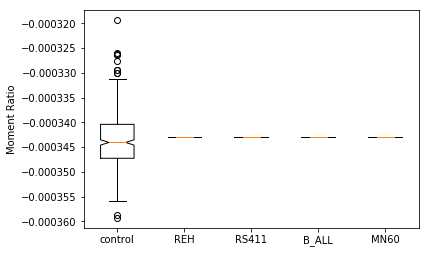

In [29]:
firstMos = []
moc = []
moR = []
moR4 = []
mo_ = []
mom = []

for ref in imglistC:
    M = measure.moments(ref)
    cr = M[1, 0] / M[0, 0]
    cc = M[0, 1] / M[0, 0]
    mo_raw = measure.moments_central(ref, cr, cc, order=1)
    mo = mo_raw[1,1]/mo_raw[0,0]**2
    firstMos.append(mo)
    moc.append(mo)
    
for ref2 in imglistR:
    M = measure.moments(ref)
    cr = M[1, 0] / M[0, 0]
    cc = M[0, 1] / M[0, 0]
    mo_raw = measure.moments_central(ref, cr, cc, order=1)
    mo = mo_raw[1,1]/mo_raw[0,0]**2
    firstMos.append(mo)
    moR.append(mo)
    
for ref3 in imglistR4:
    M = measure.moments(ref)
    cr = M[1, 0] / M[0, 0]
    cc = M[0, 1] / M[0, 0]
    mo_raw = measure.moments_central(ref, cr, cc, order=1)
    mo = mo_raw[1,1]/mo_raw[0,0]**2
    firstMos.append(mo)
    moR4.append(mo)
    
for ref4 in imglist[:394]:
    M = measure.moments(ref)
    cr = M[1, 0] / M[0, 0]
    cc = M[0, 1] / M[0, 0]
    mo_raw = measure.moments_central(ref, cr, cc, order=1)
    mo = mo_raw[1,1]/mo_raw[0,0]**2
    firstMos.append(mo)
    mo_.append(mo)

for ref5 in imglistM:
    M = measure.moments(ref)
    cr = M[1, 0] / M[0, 0]
    cc = M[0, 1] / M[0, 0]
    mo_raw = measure.moments_central(ref, cr, cc, order=1)
    mo = mo_raw[1,1]/mo_raw[0,0]**2
    firstMos.append(mo)  
    mom.append(mo)
    
np.array(moc)
np.array(moR)
np.array(moR4)
np.array(mo_)
np.array(mom)

plt.figure()
plt.boxplot((moc, moR, moR4, mo_, mom), notch=True);

plt.ylabel("Moment Ratio");
plt.xticks([1,2,3,4,5], ['control', 'REH', 'RS411', 'B_ALL', 'MN60']);

In [ ]:
featMat = np.vstack((feats5, feats3, feats4, feats1[:394,:], feats2))

In [ ]:
drymass = np.loadtxt('drymass.csv', delimiter=',')
drymass.shape
drymass1 = drymass[:1201]
drymass2 = drymass[1201:]
drymass = np.vstack((drymass1.reshape(len(drymass1), 1), drymass2.reshape(len(drymass2), 1)))
drymass.shape

d1 = drymass1[:406] # control
d2 = drymass1[406:795] # REH
d3 = drymass1[795:] # RS411
d4 = drymass2[:394] # BALL
d5 = drymass2[394:] # MN60

plt.figure()
plt.boxplot((d1, d2, d3, d4, d5), notch=True);
d3.shape

plt.ylabel("Drymass");
plt.xticks([1,2,3,4,5], ['control', 'REH', 'RS411', 'B_ALL', 'MN60']);

In [ ]:
featMatNew = np.hstack((featMat, np.array(shannonB)))
print(featMat.shape)
print(np.array(shannonB).shape)
print(featMatNew.shape)
drymass.shape

In [ ]:
feats=featMatNew[:,:4]
feats = np.hstack((feats, np.array(firstMos).reshape(len(firstMos), 1)))
feats = np.hstack((feats, drymass))
classes = featMatNew[:,4]

for i in range(len(classes)):
    if classes[i] > 1 and classes[i] < 4:
        classes[i] = 2
    elif classes[i] >= 4:
        classes[i] = 3

In [ ]:
np.savetxt("scat3.txt", np.array(feats[:,0], feats[:,3], feats[:,5], classes))

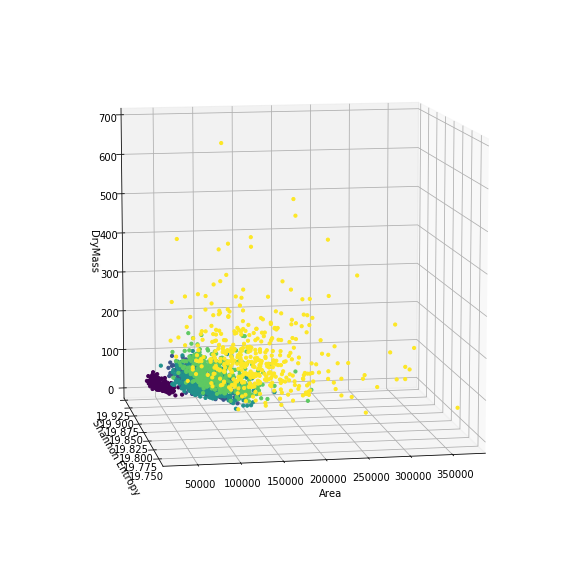

In [45]:
from mpl_toolkits.mplot3d import Axes3D  
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(feats[:,0], feats[:,3], feats[:,5], c=classes, s=10, alpha=1);
ax.view_init(10, 260)
ax.set_xlabel("Area");
ax.set_ylabel("Shannon Entropy");
ax.set_zlabel("DryMass")
plt.savefig('3D5class.pdf')  

In [46]:
from sklearn.cross_validation import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
kf = KFold(n=len(classes), n_folds = 5, shuffle=True)
for trainindex, testindex in kf:
    #print(testindex)
    clf = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(random_state=0, max_depth=10), n_estimators = 200, learning_rate=0.1)
    clf.fit(feats[trainindex], classes[trainindex])
    x = clf.predict(feats[testindex])
    #print(x)
    #print(classes[testindex])
    print(clf.score(feats[testindex], classes[testindex]))

0.6567164179104478
0.6766169154228856
0.6194029850746269
0.6616915422885572
0.664179104477612


In [47]:
mat2 = feats[407:1595,:]
clas2 = classes[407:1595]

kf = KFold(n=len(clas2), n_folds = 5, shuffle=True)
for trainindex, testindex in kf:
    #print(testindex)
    clf = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(random_state=0, max_depth=10), n_estimators = 200, learning_rate=0.1)
    clf.fit(mat2[trainindex], clas2[trainindex])
    x = clf.predict(feats[testindex])
    #print(x)
    #print(classes[testindex])
    print(clf.score(feats[testindex], classes[testindex]))

0.5882352941176471
0.5714285714285714
0.5882352941176471
0.6244725738396625
0.5358649789029536


In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel

X_train, X_test, y_train, y_test = train_test_split(feats, classes, test_size=0.4, random_state=0)
rclf = RandomForestClassifier(n_estimators=250, random_state=0, n_jobs=-1)
rclf.fit(X_train, y_train)
for feature in rclf.feature_importances_:
    print(feature)
    
# in order: 
#(drymass, Shannon, area, perimeter, compactness,ratio)

0.21893583012970882
0.22436597954786136
0.13268138865620716
0.1445840992747933
0.015206416459347076
0.2642262859320824


In [49]:
for i in range(len(classes)):
    if classes[i] > 1 and classes[i] < 4:
        classes[i] = 2
    elif classes[i] >= 4:
        classes[i] = 3

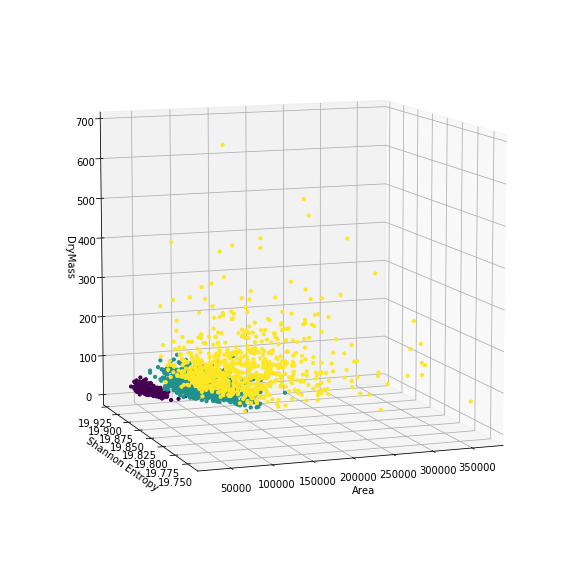

In [50]:
from mpl_toolkits.mplot3d import Axes3D  
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(feats[:,0], feats[:,3], feats[:,5], c=classes, s=10, alpha=1);
ax.view_init(10, 250)
ax.set_xlabel("Area");
ax.set_ylabel("Shannon Entropy");
ax.set_zlabel("DryMass")
plt.savefig('3D3class.pdf')  

In [40]:
from sklearn.ensemble import AdaBoostClassifier
kf = KFold(n=len(classes), n_folds = 10, shuffle=True)
for trainindex, testindex in kf:
    #print(testindex)
    clf = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(random_state=0, max_depth=10), n_estimators = 200, learning_rate=0.1)
    clf.fit(feats[trainindex, 1:], classes[trainindex])
    x = clf.predict(feats[testindex, 1:])
    #print(x)
    #print(classes[testindex])
    print(clf.score(feats[testindex, 1:], classes[testindex]))

0.845771144278607
0.8706467661691543
0.845771144278607
0.8308457711442786
0.8656716417910447
0.8208955223880597
0.8805970149253731
0.845771144278607
0.8706467661691543
0.8606965174129353


In [41]:
from sklearn.neighbors import KNeighborsClassifier
kf = KFold(n=len(classes), n_folds = 10, shuffle=True)
for trainindex, testindex in kf:
    #print(testindex)
    clf = KNeighborsClassifier()
    clf.fit(feats[trainindex], classes[trainindex])
    x = clf.predict(feats[testindex])
    #print(x)
    #print(classes[testindex])
    print(clf.score(feats[testindex], classes[testindex]))

0.8308457711442786
0.6965174129353234
0.8009950248756219
0.7512437810945274
0.7512437810945274
0.7064676616915423
0.746268656716418
0.7661691542288557
0.7960199004975125
0.7761194029850746


In [42]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

kf = KFold(n=len(classes), n_folds = 10, shuffle=True)
for trainindex, testindex in kf:
    #print(testindex)
    clf = GaussianProcessClassifier(1.0 * RBF(1.0))
    clf.fit(feats[trainindex], classes[trainindex])
    x = clf.predict(feats[testindex])
    #print(x)
    #print(classes[testindex])
    print(clf.score(feats[testindex], classes[testindex]))

KeyboardInterrupt: 

In [ ]:
mat2 = feats[407:1595,:]
clas2 = classes[407:1595]

kf = KFold(n=len(clas2), n_folds = 5, shuffle=True)
for trainindex, testindex in kf:
    #print(testindex)
    clf = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(random_state=0, max_depth=10), n_estimators = 200, learning_rate=0.1)
    clf.fit(mat2[trainindex], clas2[trainindex])
    x = clf.predict(feats[testindex])
    #print(x)
    #print(classes[testindex])
    print(clf.score(feats[testindex], classes[testindex]))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel

X_train, X_test, y_train, y_test = train_test_split(feats, classes, test_size=0.4, random_state=0)
rclf = RandomForestClassifier(n_estimators=250, random_state=0, n_jobs=-1)
rclf.fit(X_train, y_train)
for feature in rclf.feature_importances_:
    print(feature)
    
# in order: 
#(drymass, Shannon, perimeter, area, compactness,ratio)

In [ ]:
from sklearn.feature_selection import mutual_info_classif

mutual_info_classif(X_train, y_train)

In [ ]:
plt.figure(figsize=(25,24))
plt.subplot(5,3,1)
plt.scatter(feats[:,0], feats[:,1])
plt.xlabel("Area")
plt.ylabel("Perimeter")
plt.subplot(5,3,2)
plt.scatter(feats[:,0], feats[:,2])
plt.xlabel("Area")
plt.ylabel("Compactness")
plt.subplot(5,3,3)
plt.scatter(feats[:,0], feats[:,3])
plt.xlabel("Area")
plt.ylabel("Shannon Entropy")
plt.subplot(5,3,4)
plt.scatter(feats[:,0], feats[:,4])
plt.xlabel("Area")
plt.ylabel("Moment Ratio")
plt.ylim((-0.0004, -0.0003))
plt.subplot(5,3,5)
plt.scatter(feats[:,0], feats[:,5])
plt.xlabel("Area")
plt.ylabel("Drymass")
plt.subplot(5,3,6)
plt.scatter(feats[:,1], feats[:,2])
plt.xlabel("Perimeter")
plt.ylabel("Compactness")
plt.subplot(5,3,7)
plt.scatter(feats[:,1], feats[:,3])
plt.xlabel("Perimeter")
plt.ylabel("Shannon Entropy")
plt.subplot(5,3,8)
plt.scatter(feats[:,1], feats[:,4])
plt.xlabel("Perimeter")
plt.ylabel("Moment Ratio")
plt.ylim((-0.0004, -0.0003))
plt.subplot(5,3,9)
plt.scatter(feats[:,1], feats[:,5])
plt.xlabel("Perimeter")
plt.ylabel("Drymass")
plt.subplot(5,3,10)
plt.scatter(feats[:,2], feats[:,3])
plt.xlabel("Compactness")
plt.ylabel("Shannon Entropy")
plt.subplot(5,3,11)
plt.scatter(feats[:,2], feats[:,4])
plt.xlabel("Compactness")
plt.ylabel("Moment Ratio")
plt.ylim((-0.0004, -0.0003))
plt.subplot(5,3,12)
plt.scatter(feats[:,2], feats[:,5])
plt.xlabel("Compactness")
plt.ylabel("Drymass")
plt.subplot(5,3,13)
plt.scatter(feats[:,3], feats[:,4])
plt.xlabel("Shannon Entropy")
plt.ylabel("Moment Ratio")
plt.ylim((-0.0004, -0.0003))
plt.subplot(5,3,14)
plt.scatter(feats[:,3], feats[:,5])
plt.xlabel("Shannon Entropy")
plt.ylabel("Drymass")
plt.subplot(5,3,15)
plt.scatter(feats[:,4], feats[:,5])
plt.xlabel("Moment Ratio")
plt.ylabel("Drymass")
plt.xlim((-0.0004, -0.0003))

In [ ]:
np.corrcoef(feats[:,3], feats[:,5])

In [37]:
measure.moments_central?

In [55]:
feats[:,4].shape

(2010,)

In [56]:
feats[:,2].shape

(2010,)

(-0.0004, -0.0003)

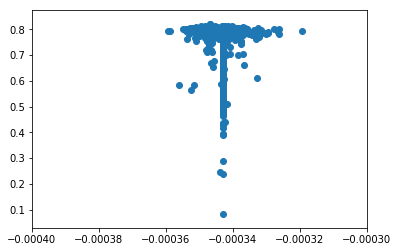

In [64]:
plt.scatter(feats[:,4], feats[:,2])
plt.xlim(-0.0004, -0.0003)